In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#plt.style.use('ggplot')

- parameters to vary:
    - number of redundant / informative variables / noise variables;
    - total # of variables;
    - vary the collinearity within classes

- Questions to answer / TODO
    - Does the amount of collinearity matter?
    - Measure the proportion of collinearity (look up from paper)

In [53]:
#Decision boundary for NB
def nb_1(y):
    a = nb_mean[0][0]
    b = nb_mean[0][1]
    c = nb_std[0][0]**2
    d = 0
    e = nb_std[0][1]**2
    f = nb_mean[1][0]
    g = nb_mean[1][1]
    h = nb_std[1][0]**2
    i = 0
    j = nb_std[1][1]**2

    A = ((e/(c*e - d**2)) - (j/(h*j - i**2)))
    B = (((2*(b*d - a*e - d*y))/(c*e-d**2)) + ((2*(-g*i + f*j + i*y))/(h*j-i**2)))
    C = (math.log10(c*e-d**2) + ((c*b**2 - e*a**2 - 2*a*b*d)/(c*e-d**2)) - \
    math.log10(h*j-i**2) - ((h*g**2 + j*f**2 - 2*f*g*i)/(h*j-i**2)) + \
    ((c/(c*e-d**2))*np.square(y)) - ((h/(h*j-i**2))*np.square(y)) + \
    ((2*y*(a*d-c*b))/(c*e-d**2)) - ((2*y*(f*i-h*g))/(h*j-i**2)))
    x = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)

    return x

def nb_2(y):
    a = nb_mean[0][0]
    b = nb_mean[0][1]
    c = nb_std[0][0]**2
    d = 0
    e = nb_std[0][1]**2
    f = nb_mean[1][0]
    g = nb_mean[1][1]
    h = nb_std[1][0]**2
    i = 0
    j = nb_std[1][1]**2

    A = ((e/(c*e - d**2)) - (j/(h*j - i**2)))
    B = (((2*(b*d - a*e - d*y))/(c*e-d**2)) + ((2*(-g*i + f*j + i*y))/(h*j-i**2)))
    C = (math.log10(c*e-d**2) + ((c*b**2 - e*a**2 - 2*a*b*d)/(c*e-d**2)) - \
    math.log10(h*j-i**2) - ((h*g**2 + j*f**2 - 2*f*g*i)/(h*j-i**2)) + \
    ((c/(c*e-d**2))*np.square(y)) - ((h/(h*j-i**2))*np.square(y)) + \
    ((2*y*(a*d-c*b))/(c*e-d**2)) - ((2*y*(f*i-h*g))/(h*j-i**2)))
    x = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)

    return x

In [79]:
#Navie Bayes
class NaiveBayes:
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.df = pd.DataFrame({'X1':x_train[0],'X2':x_train[1], 'class':y_train})

    def split_class(self):
        df_0 = self.df[self.df['class']==0]
        df_1 = self.df[self.df['class']==1]

        return df_0.drop(['class'], axis=1), df_1.drop(['class'], axis=1)

    def get_summaries(self, df_0, df_1):
        mean = [0, 0]
        std = [0, 0]

        mean[0] = [df_0['X1'].mean(), df_0['X2'].mean()]
        mean[1] = [df_1['X1'].mean(), df_1['X2'].mean()]

        std[0] = [df_0['X1'].std(), df_0['X2'].std()]
        std[1] = [df_1['X1'].std(), df_1['X2'].std()]

        return mean, std

    def calc_prob(self, x, mean, std):
        exponent = list(map(lambda x: math.exp(-(math.pow(x-mean,2)/(2*math.pow(std,2)))), x))
        return list(map(lambda exp: (1 / (math.sqrt(2*math.pi) * std)) * exp, exponent))

    def get_probs(self, x_vals):
        probs = [0, 0]
        for idx, (means, stds) in enumerate(zip(self.mean, self.std)):
            probs[idx] = np.ones(len(x_vals))
            for i, (m, s) in enumerate(zip(means, stds)):
                probs[idx] = list(map(lambda x,y: x*y, probs[idx], self.calc_prob(x_vals[:,i], m, s)))
        return probs

    def predict(self, x_vals):
        probs = self.get_probs(x_vals)
        preds = list()
        for n, p in zip(probs[0], probs[1]):
            pred = 0 if n>p else 1
            preds.append(pred)
        return preds

    def train(self):
        df_0, df_1 = self.split_class()
        self.mean, self.std = self.get_summaries(df_0, df_1)
        return self.mean, self.std

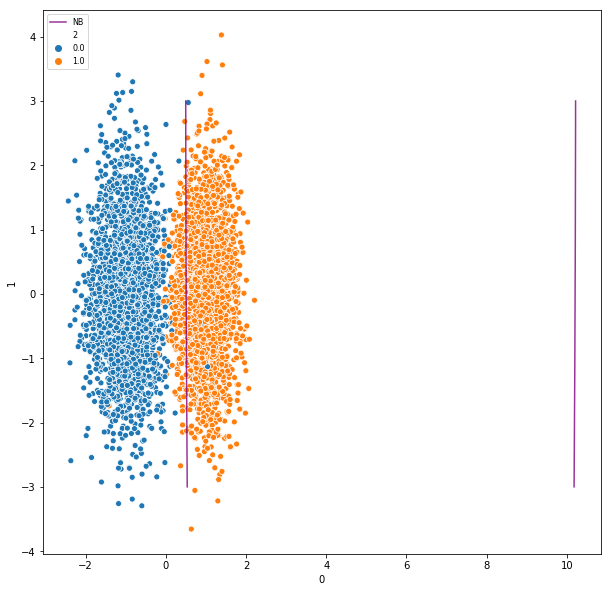

In [82]:
import math
df = generate_data(1,0,1)

#plt.scatter(df[df[2]==0][0],df[df[2]==0][1],alpha=.4,color="red")
#plt.scatter(df[df[2]==1][0],df[df[2]==1][1],alpha=.4,color="blue")

nb=NaiveBayes(df[[0,1]],df[2])
nb_mean,nb_std = nb.train()

x2_vals = np.linspace(-3,3,400)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
sns.scatterplot(x=0, y=1, hue=2, data=df,ax=ax)
ax.plot(nb_1(x2_vals), x2_vals, color='purple', alpha=0.8)
ax.plot(nb_2(x2_vals), x2_vals, label='NB', color='purple', alpha=0.8)
ax.legend(loc="upper left", fontsize=8)



In [71]:
#Generate data with varying # of redundant and informative features
def generate_data(n_informative,n_redundant,n_noise,random_state=1):    
    X,Y = datasets.make_classification(n_samples=5000,
                                            n_features=n_redundant+n_informative+n_noise,
                                               n_redundant=n_redundant,
                                               n_informative=n_informative,
                                               n_clusters_per_class=1,
                                              class_sep=1,
                                              random_state=random_state)
    cor_data = np.concatenate((X,Y.reshape(-1,1)),axis=1)
    return pd.DataFrame(cor_data)

#Return accuracy depending on data and method
def measure_accuracy(df,model):
    train, test = train_test_split(df, shuffle=False)
    model.fit(train.loc[:,0:(train.shape[1]-2)], train.loc[:,train.shape[1]-1])
    predictions = model.predict(test.loc[:,0:(test.shape[1]-2)])
    tn, fp, fn, tp = confusion_matrix(test.loc[:,test.shape[1]-1],predictions).ravel()
    return (tp+tn)/(tn+fp+fn+tp)

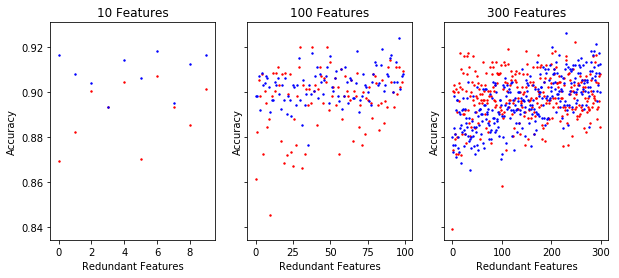

In [84]:
#Vary the proportion of noisy and redundant features and measure accuracy
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
max_features_dict = {0:10,1:100,2:300}

#Create 3 plots and vary the max # of features
for p in range(3):
    gnb_accuracies = []
    lr_accuracies = []
    max_features = max_features_dict[p]
    #Out of the max_features, 2 informative and vary how many are redundant
    for i in range(max_features):
        n_informative = 2
        n_redundant = i
        n_noise = max_features - i - 1
        df = generate_data(n_informative,n_redundant,n_noise)
        gnb_accuracies.append(measure_accuracy(df,gnb))
        lr_accuracies.append(measure_accuracy(df,lr))
    axs[p].scatter(x=list(range(max_features)),y=gnb_accuracies,color="red",s=2)
    axs[p].scatter(x=list(range(max_features)),y=lr_accuracies,color="blue",s=2)
    axs[p].set_title(str(max_features)+" Features")
    axs[p].set_xlabel("Redundant Features")
    axs[p].set_ylabel("Accuracy")
    
plt.show()

#Performs reasonably well 2 informative features and 98 noise. Lowest accuracy is 82%
#Performs very well with 2 informative and varying redundant. Probably because it takes the max over the product of all probabilities, as long as there is some signal and then remaining noise, the decision will be correct

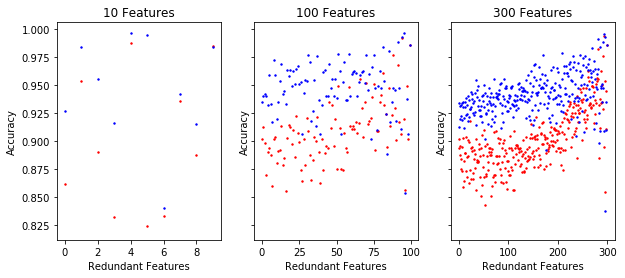

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
max_features_dict = {0:10,1:100,2:300}

#Create 3 plots and vary the max # of features
for p in range(3):
    gnb_accuracies = []
    lr_accuracies = []
    max_features = max_features_dict[p]
    #Out of the max_features, vary how many are informative vs redundant
    for i in range(max_features):
        n_informative = max_features - i
        n_redundant = i
        n_noise = 0
        df = generate_data(n_informative,n_redundant,n_noise)
        gnb_accuracies.append(measure_accuracy(df,gnb))
        lr_accuracies.append(measure_accuracy(df,lr))
    axs[p].scatter(x=list(range(max_features)),y=gnb_accuracies,color="red",s=2)
    axs[p].scatter(x=list(range(max_features)),y=lr_accuracies,color="blue",s=2)
    axs[p].set_title(str(max_features)+" Features")
    axs[p].set_xlabel("Redundant Features")
    axs[p].set_ylabel("Accuracy")
    
plt.show()